# Priors

##### Keywords: conjugate prior, noninformative prior, weakly informative prior,  jeffreys prior, normal-normal model, sampling and priors, bayesian, MCMC, metropolis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sn

from scipy.stats import norm


//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Contents
{:.no_toc}
* 
{: toc}

We have seen conjugate priors that are nice and have some explanation for us to understand to boot. But the algebra can be tediousm and while we can build all these examples, we run the danger of bending the model to algrebra. The best thing to do is to adapt our prior to the situation, and make sure the priors  do not strongly inﬂuence the posterior distribution.

## Flat priors and transformations

What we want are **uninformative priors**.

Let us first consider priors on location. Why not assign flat priors? Are not those the most un-informative? Since we do not know where the actual value lies in the parameter space, we might as well consider all values with equal probability. This prior however is not transformation invariant. What does this mean? Suppose we have a random variable $X$ from Bernoulli($\theta$). We define the prior $p(\theta)=1$.



(0, 2)

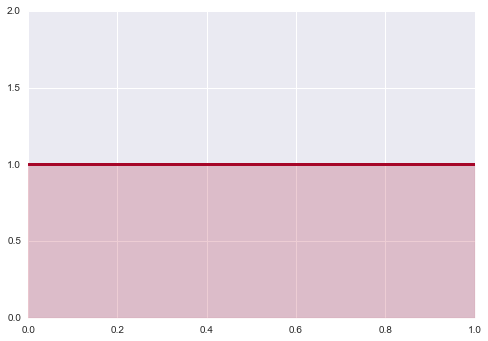

In [5]:
x = np.linspace( 0.000 ,1, 150 )
y = np.linspace( 1.0, 1.0, 150 )
lines = plt.plot( x, y, color="#A60628", lw = 3 )
plt.fill_between( x, 0, y, alpha = 0.2, color = lines[0].get_color() )
plt.autoscale(tight=True)
plt.ylim( 0, 2)

Now, let's transform $\theta$ with the function $\psi=\log \frac{\theta}{1−θ}$. This is just a function to stretch θ across the real line. Now how likely are different values of ψ under our transformation?

If you remember from back when we talked about distributions and transformations (and box-mueller), we must take the jacobian into account. In other words

$$dP\vert_{\psi} = dP\vert_{\theta} \implies f(\psi)d\psi = g(\theta)d\theta$$

where $f$ and $g$ are the densities.

Thus 
$$f(\psi) = J(\psi) g(\theta)$$

where 

$$J(\psi) = det(\frac{d\theta}{d\psi}) = abs(\frac{d(e^{\psi}/(1+e^{\psi})}{d\psi}) = \frac{e^\psi}{(1+e^{\psi})^2}$$

Since the pdf $g$ is just the uniform pdf, the new pdf is simply the jacobian, which does not look flat at all!

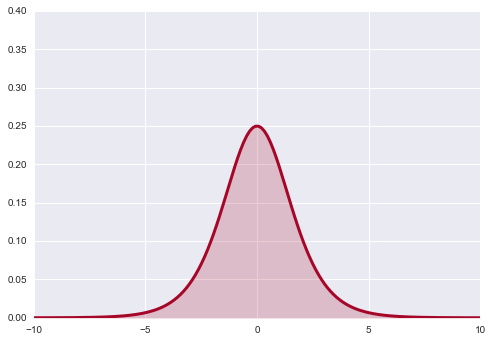

In [9]:
psi = np.linspace( -10 ,10, 150 )
y = np.exp(psi) / (1 + np.exp(psi))**2
lines = plt.plot( psi, y, color="#A60628", lw = 3 )
plt.fill_between( psi, 0, y, alpha = 0.2, color = lines[0].get_color() )
plt.autoscale(tight=True)
plt.ylim( 0, .4);

As it turns out flat priors do carry information  after all. 

Another way to think about this is the beta-binomial model in which you use a uniform, ie a $Beta(1,1)$ prior. This adds one "success" and  one "failure", which in the limit of low data can have quite a regularizing effect.

## Uninformative Priors

The **location prior** above can produce
any sample on the real line. Thus, this ﬂat prior is not a probability density because it does not integrate to a finite number. Such a prior is called
an **improper prior**. It expresses our state of ignorance  on the random variable in question.

Despite the fact that this prior is both improper and dependent on parametrization, it is widely used.

If an improper prior does not lead to an improper posterior (a posterior that does not integrate to a finite number), we are fine. For example, one can start with a flat prior and a gaussian likelihood. The gaussian posterior then has a well defined integral.

### Jeffreys prior

What do we do for **priors of scale variables**, such as the precision/variance of a gaussian?

The point of Jeffreys Priors is to create priors that don't  become informative when you transform the variables.
Jeffreys Priors are defined as:

$$p_J(\theta)\propto {\bf I}(\theta)^{1/2}$$

The Fisher Information ${\bf I}$ is the second derivative of the likelihood surface and thus represents the curvature of that surface:

$${\bf I}(\theta)=det(−E\left[ \frac{d^{2} \log p(X \vert \theta)}{d\theta_i\theta_j} \right])$$

where the expectation is with respect to the likelihood.

You can convince yourself that  $p_J$ is invariant under a change of variable, unlike the uniform prior above; this is particularly easy to show in one dimension.

### Jeffrey's priors for the gaussian-gaussian model

For a gaussian with known $\sigma$ (see the normal model),  lets find the Jeffrey's prior for the location parameter $\mu$:

$$I \propto E_{f\vert\sigma} \left[\frac{1}{\sigma^2}\right] = \frac{1}{\sigma^2} $$ 

(by $f \vert \sigma$ we mean holding $\sigma$ fixed or likelihood as a function of $\mu$)

The Jeffrey's prior is thus $1/\sigma$ and for fixed $\sigma$ this is the improper uniform....

What about for $\sigma^2$.

Then:

$$I  = E_{f \vert \mu}\left[\frac{d^2}{d\sigma^2}( log(\sigma) +(x-\mu)^2/2\sigma^2)\right] = E_{f \vert \mu}\left[-\frac{1}{\sigma^2} + 3 \frac{(x-\mu)^2}{\sigma^4}\right] = \frac{2}{\sigma^2}$$

which makes the prior $1/\sigma$.

We will utlize these when we talk about linear-regression soon

### KL-Maximization priors

José Bernardo (in The Bayesian Choice) chooses priors by maximising the Kullback distance between prior and posterior. This means he maximises the information brought by the data, and thus the information from the prior is "minimum" In the simplest cases with no additional (nuisance) parameters, this becomes the Jeffreys' prior.  These get more complex once you have multiple parameters


## Weakly Informative or regularizing Prior

A related idea is the `weakly` informative prior, which attempts to 'regularize' the posterior by keeping it within reasonable bounds, but which tries not to affect the data as much as possible. Thus for example, one night restrict a uniform prior to a specific range., or broaden a highly informative gaussian prior to diffuse the information. One might use a $\gamma$ for a positive quantity such as a precision or variance, or a half-cauchy if we wish to not limit the possibility of outliers on the positive axis. A gaussian prior can be used for priora on the entire  real line but we often get away with using a gaussian prior which dies quickly on the positive axis. If we need to deal with outliers on the whole real line we might use a fully cauchy or a students t.

We will see all of these priors as we deal with individual examples right through this course.

### Normal-Normal Example

Here is an example of a problematic normal model with uninformative priors on both $\mu$ and $\sigma$. We  have minimal data, to points, 1 and -1, and wish to find a normal model that gives us this data. (This is an example from McElreath)

In [25]:
# this code is taken from https://github.com/fonnesbeck/Bios8366/blob/master/notebooks/Section4_2-MCMC.ipynb

rnorm = np.random.normal
runif = np.random.rand

def metropolis(posterior, n_iterations, initial_values, prop_std=[1,1], doPrint=True):
    #################################################################
    # function to sample using Metropolis 
    # (assumes proposal distribution is symmetric)
    # 
    # n_iterations:  number of iterations
    # initial_values: multidimensional start position for our chain
    # prop_std: standard deviation for Gaussian proposal distribution 
    ##################################################################
    
    
    #np.random.seed(seed=1)
    n_params = len(initial_values)
            
    # Initial proposal standard deviations
    # generates a list of length n_params
    #prop_sd = [prop_std]*n_params
    prop_sd = prop_std
    
    # Initialize trace for parameters
    trace = np.empty((n_iterations+1, n_params))
    
    # Set initial values
    trace[0] = initial_values
        
    # Calculate joint posterior for initial values
    # the * assigns the arguments of the function according to the list elements
    current_prob = posterior(*trace[0])
    
    # Initialize acceptance counts
    # We can use this to tune our step size
    accepted = [0]*n_params
    
    for i in range(n_iterations):
    
        if not i%10000 and doPrint: 
            print('Iterations left: ', n_iterations-i)
    
        # Grab current parameter values
        current_params = trace[i]
    
        # Get current value for parameter j
        p = trace[i].copy() 
        
        # loop over all dimensions
        for j in range(n_params):
            # proposed new value
            theta = rnorm(current_params[j], prop_sd[j])
            
            # Insert new value 
            p[j] = theta
    
            # Calculate posterior with proposed value
            proposed_prob = posterior(*p)
    
            # Log-acceptance rate
            alpha = proposed_prob/current_prob
    
            # Sample a uniform random variate
            u = runif()
    
            # Test proposed value
            if (u) < alpha:
                # Accept
                trace[i+1,j] = theta
                current_prob = proposed_prob
                accepted[j] += 1
            else:
                # Stay put
                trace[i+1,j] = trace[i,j]
            
            # update p so we search the next dimension according
            # to the current result
            p[j] = trace[i+1,j]
    
    # return our samples and the number of accepted steps
    return trace, accepted

In [49]:
def corrplot(trace, maxlags=50):
    plt.acorr(trace-np.mean(trace),  normed=True, maxlags=maxlags);
    plt.xlim([0, maxlags])

In [57]:
from scipy.stats import norm
data=[-1, 1]
lik = lambda mu, sigma: np.prod(norm.pdf(data, mu, sigma))
prior_mu = lambda mu: 1
prior_sigma = lambda sigma: 1*(sigma > 0)
post = lambda mu, sigma: lik(mu, sigma)*prior_mu(mu)*prior_sigma(sigma)

In [58]:
lik(1,2)

0.024133088157513478

In [60]:
mu0=0
sigma0=1
nsamps=50000
samps, acc = metropolis(post, nsamps, [mu0, sigma0], [50,50])

Iterations left:  50000
Iterations left:  40000
Iterations left:  30000
Iterations left:  20000
Iterations left:  10000


In [61]:
np.array(acc)/nsamps

array([ 0.64658,  0.62124])

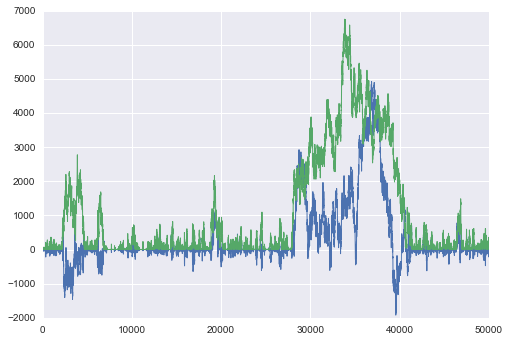

In [62]:
plt.plot(samps, lw=1);

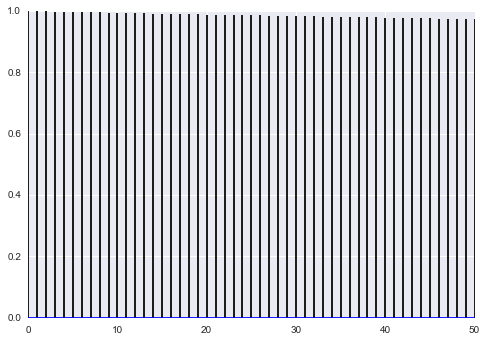

In [63]:
corrplot(samps[10000:,0])

As McElreath says:

>The reason the model above drifts wildly in both dimensions is that there is very little data, just two observations, and flat priors. The flat priors say that every possible value of the parameter is equally plausible, a priori. For parameters that can take a potentially infinite number of values, like alpha, this means the Markov chain needs to occasionally sample some pretty extreme and implausible values, like negative 30 million. These extreme drifts overwhelm the chain. If the likelihood were stronger, then the chain would be fine, because it would stick closer to zero. (McElreath 258-259)



### Weakly regularizing priors on $\mu$ and $\sigma$

We now put 2 weakly regularizig priors in. A normal on the mean with a wide width of 10, and a half-cauchy on the  standard-deviation with a scale of  1, which gets pretty low by 6, but remember its a cauchy, so you can still occasionally get really large samples...

In [68]:
from scipy.stats import halfcauchy
prior_mu_2 = lambda mu: norm.pdf(mu, 0, 10)
prior_sigma_2 = lambda sigma: halfcauchy.pdf(sigma)

I tried to plot a likelihood for a fixed $\sigma=3$ on the same scale as the priors, so that we can get an idea of what these look like..

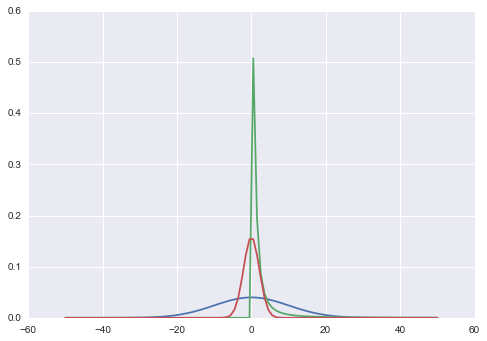

In [94]:
xx=np.linspace(-50,50,100)
plt.plot(xx, prior_mu_2(xx));
plt.plot(xx, prior_sigma_2(xx));
likmu = lambda mulist: [10*lik(mu, 3) for mu in mulist]
plt.plot(xx, likmu(xx));

In [95]:
post2 = lambda mu, sigma: lik(mu, sigma)*prior_mu_2(mu)*prior_sigma_2(sigma)

In [112]:
mu0=0
sigma0=1
nsamps=50000
samps2, acc2 = metropolis(post2, nsamps, [mu0, sigma0], [4,2])

Iterations left:  50000
Iterations left:  40000
Iterations left:  30000
Iterations left:  20000
Iterations left:  10000


In [113]:
np.array(acc2)/nsamps

array([ 0.33526,  0.36368])

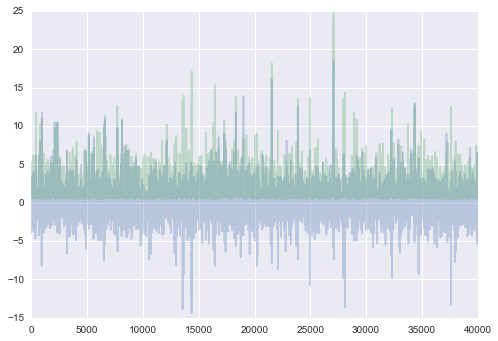

In [114]:
plt.plot(samps2[10000:], alpha=0.3)

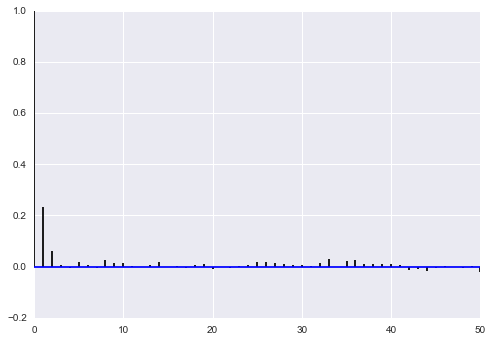

In [115]:
corrplot(samps2[10000::5,0])

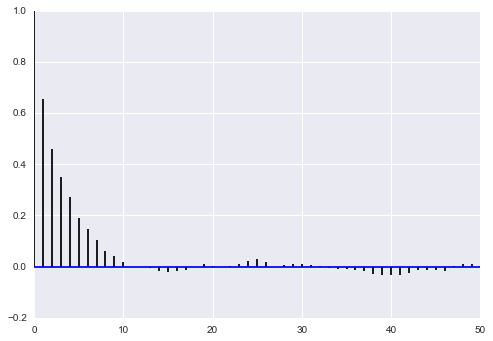

In [116]:
corrplot(samps2[10000::5,1])

(-10, 15)

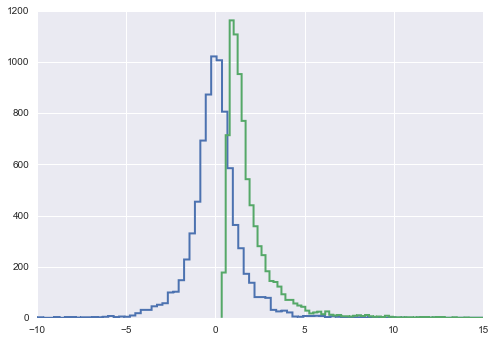

In [130]:
plt.hist(samps2[10000::5,0], histtype="step", lw=2, bins=100)
plt.hist(samps2[10000::5,1], histtype="step", lw=2, bins=100);
plt.xlim([-10,15])

## Other choices

### Maximum Entropy priors

We can use the maxent principle which guided our choice of likelihoods to pick priors as well. Above we used weak regularization to drive our samplers, and in general, when we are solving density estimation or generalized regression problems, we can use such priors to tame our samplers, prevent overfitting, and direct parameter space.

But some times, we do have some actual additional information about the parameters. In this case we can choose distributions consistent with this knowledge or these constraints that have maximum entropy: once again, as in likelihoods, this is the most conservative choice, which introduces no other assumptions by accident.


### Empirical Bayes Priors

This class of priors is one where we use the data to estimate the prior. This turns out to be very useful, and we shall see **hierarchical** models with this structure. But it does send pure Bayesians into some conniptions...

## Priors lose their powers as N increases 

The decrease of the influence of the prior by enough data is also good news: if our prior is significantly wrong, then the data will correct that eventually we will presented with the correct posterior.

Lets demonstrate this with an example. We look at the case where the likelihood is a Bernoulli and we choose two Beta priors, one a flat prior and the other biased  towards 0 . We look at the parameter $\theta$ of the two posteriors. As the sample size increases, the posteriors converge.

The Beta is conjugate prior to Bernouli and the hypermprameters (parameters of the distribution function) are given 

$$ Beta\left(a+\sum_i x_i ,b+n-\sum_i x_i\right)=Beta(a,b) \, \, \rm{Bernoulli(x|\theta)}$$



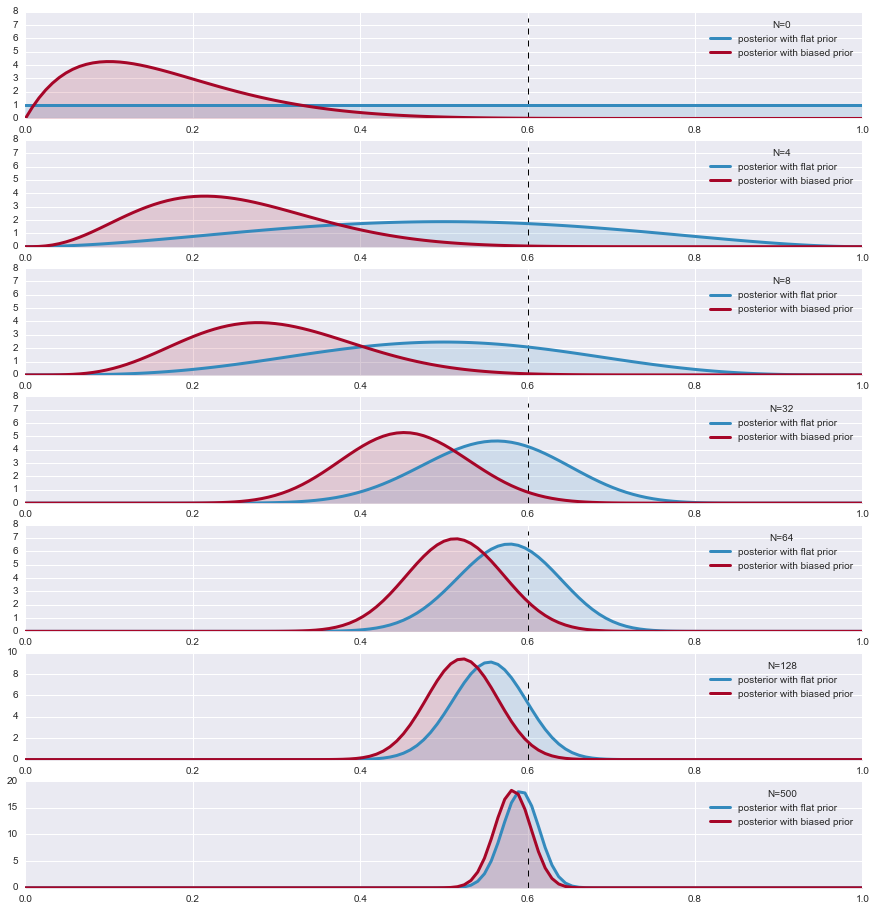

In [131]:
import scipy.stats as stats

plt.figure(figsize=( 15, 18))

p = 0.6
beta1_params = np.array( [1.,1.] )  # FLAT 
beta2_params = np.array( [2,10] )
beta = stats.beta 

x = np.linspace(0.00, 1, 125)
data = stats.bernoulli.rvs(p,size=500)   #LIKELIHOOD

for i,N in enumerate([0,4,8, 32,64, 128, 500]):
    s = data[:N].sum() 
    plt.subplot(8,1,i+1)
    params1 = beta1_params + np.array( [s, N-s] )    # posteriors beta parameters
    params2 = beta2_params + np.array( [s, N-s] )
    
    y1,y2 = beta.pdf( x, *params1), beta.pdf( x, *params2)  # the posterior 
    plt.plot( x,y1, label = r"posterior with flat prior", lw =3, color ="#348ABD" )
    plt.plot( x, y2, label = "posterior with biased prior", lw= 3, color ="#A60628" )
    plt.fill_between( x, 0, y1, color ="#348ABD", alpha = 0.15) 
    plt.fill_between( x, 0, y2, color ="#A60628", alpha = 0.15) 
    plt.legend(title = "N=%d"%N)
    plt.vlines( p, 0.0, 7.5, linestyles = "--", linewidth=1)
    #plt.ylim( 0, 10)#